---
# Unit10: Ambient Noise Tomography

This notebook has the activities of the Course **ProSeisSN**. It deals with time series processing using a passive seismic dataset using [ObsPy](https://docs.obspy.org/).

#### Dependencies: Obspy, Numpy, Matplotlib
#### Reset the Jupyter notebook in order to run it again, press:
***Kernel*** -> ***Restart & Clear Output***
#### The code $\Downarrow$ BELOW $\Downarrow$ runs a notebook with other dependencies

---
## Green's functions (GF)
1) **Seismic noise interferometry (SNI)**
- The cross-correlation of a random wavefield at two locations $A$ and $B$ would yield the seismic energy that would be recorded at $B$ as if there had been an impulsive seismic source at $A$, and vice versa (https://doi.org/10.1111/j.1365-246X.2011.05007.x). This result is often given in terms of a Green's function.

2) **Noise Cross-correlation Function (NCF)**
- Given two seismometers, $u_1$ and $u_2$, on the surface, will record ground motion as a function of time. Over long periods of time, the cross-correlation of ground motions is
$$C_{1,2}\left(\tau\right)=\int u_{1}\left(t\right)\,u_{2}\left(t+\tau\right)dt$$

The integration is performed over the length of the records$u_1$ and $u_2$.  
- $C_{1,2}\left(\tau\right)=\max\,\Rightarrow$ $u_{1}$ is most similar to $u_{2}$ when $u_2$ is shifted by $\tau$ in relation to $u_1$. Obviously the auto-correlation of, say $u_{1}$, has its maximum at $\tau=0$.
- The cross-correlation function (CCF) will have a peak at a time lag that corresponds to the traveltime of the wavefield between the two stations.

<div style="text-align: center;">
  <img src="./ccros.png" width="400">
</div>

- CCFs have both positive **causal** and negative **acausal** parts, or positive and negative time lags. GF have energy in both the causal and acausal parts, symmetric about zero time lag, which are the *same* in both directions along a path, the two sides of an CCF represent exactly the same information, but reversed in time. Actually the CCF will be perfectly symmetrical only in the case where *noise arrives from both sides of the interstation path with equal strength*, a case seldom found in real world.

<div style="text-align: center;">
  <img src="./causal.png" width="800">
</div>


## Seismic Noise Interferometry (SNI)
1) To retrieve the complete GF the sensors $A$ and $B$ must be completely surrounded by impulsive seismic sources. If this is the case, the energy corresponding to the *surface wave component* of interstation GFs can be at least partially reconstructed using SNI, *and* this energy can be used to infer information about the Earth's subsurface properties.
   <div style="text-align: center;">
  <img src="./GF.png" width="400">
   </div>
3) Use the **Green's Theorem** to work with the *surface-integral interferometry*.
   - Define volume V surrounded by either $\left\{ \begin{array}{l}
\textrm{independently-recorded impulsive,}\\
\textrm{or uncorrelated noise sources}
\end{array}\right\}$ on the bounding surface S.
4) Sources on S radiate energy into volume V.
5) The homogenous Green’s Function between any pair of points is obtained using reciprocity and the *Representation Theorem*, 
$$\mathbf{A}\rightarrow\textrm{Virtual source to }\mathbf{B}\,\Rightarrow\,\mathbf{G}_{AB}-\mathbf{G}_{AB}^{*}=\oint\left\{ \cdots\right\} d\mathbf{S}$$
   <div style="text-align: center;">
  <img src="./GFInt.png" width="600">
   </div>
6) Summary
| Seismic Interferometry | Cross-Correlation |
| :-: | :-: |
| Unravel the information contained in seismic noise | Virtual seismograms from noise |
| A model of the subsurface | A tool |
---


---
## Pre-processing
The processing steps differ in the Literature. Spectral whitening and normalisation are common place. Frequency ranges differ on the basis of interstation distance: the longer it is the lower the frequency band becomes.

The *spectral whitening*, or flattening, is applied to reduce the effect of energetic frequencies present in the records. The *one-bit normalisation* is applied to further down-weight the contribution of high-energy arrivals, which could have overwhelm the lower amplitude ambient noise signal. Here each data point is replaced by the amplitude signal: with either 1 or -1. This actually removes the amplitude information entirely.
$$\begin{array}{lclcl}
\qquad\textrm{Raw data}         & \rightarrow & \textrm{Remove mean+trend}  & \rightarrow & \textrm{Bandpass}\cdots\\
\cdots\textrm{Resampling}       & \rightarrow & \textrm{Whitening}          & \rightarrow & \textrm{One-Bit normalization}\cdots\\
\cdots\textrm{NCF sensor pairs} & \rightarrow & \cdots & \,          &\cdots
\end{array}$$ 

As it is always the case the reliability of the computed NCFs is assessed on the basis of SNR, on the ratio of the amplitude of any emerging coherent signal to that of the incoherent background signal.

<div style="text-align: center;">
  <img src="./cncf.png" width="400">
</div>

---
### Surface wave characteristics
1) **Wave energy**
    In solids the particle motion in the vertical-radial plane for Rayleigh waves is *retrograde elliptical*, a way to recognize their presence. Particle motion is computed between the ZZ and ZR, and between the ZZ and ZT NCFs, the latter being a diagnostic for the wave energy, since Rayleigh waves have no particle motion in the Z-T plane. Usually we focus on the NCFs, either causal or acausal, with the highest amplitude. **NB**: we need 3C sensors!

<div style="text-align: center;">
<img src="./Rpol.png" width="500">
</div>

2) **Velocity estimation**
   The maximum on a panel of NCF amplitude against frequency and time lag provides an estimate of the surface wave group velocity at its maximum amplitude. 
<div style="text-align: center;">
<img src="./vgram.png" height="400">
</div>

### Use data files from TTB22
- **The Receiver Array**
The array has 24 GS-20DX vertical geophones hooked to a $L=69$m cable, using takeouts spaced $\delta l=6$m from each other. The GS-20DX geophones have a natural frequency of $f_n=10\textrm{Hz}$, and a spurious frequency $f_{sp}>250$Hz. The array has a irregular circular shape, deployed in the Southern tip of the island, with its center at $\left(1^{\circ}12^{\prime}6.93^{\prime\prime}\textrm{S},48^{\circ}30^{\prime}23.39^{\prime\prime}\textrm{S}\right)$. Each of the 24 gather traces are $\Delta T=60$s long, with a sampling frequency of $f_{s}=250$Hz.
- **The data**
Files 3695 to 3810 were collected during 2h ebb tide with an amplitude of 0.91m.
| File | Timestamp | Tide (m) |
| :-: | :-: | :-: |
| 3695 | 2022-04-02T12:00:15 | 2.70 |
| 3810 | 2022-04-02T14:03:06 | 1.79 |
<img src="./ttbtide.png" width="500">

In [1]:
#------ Import Libraries
import sys
import os
    
#------ Work with the directory structure to include auxiliary codes
print('\n Local directory ==> ', os.getcwd())
print('  - Contents: ', os.listdir(), '\n')

path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path+"/CodePy")

%run ../CodePy/ImpMod.ipynb

#------ Alter default matplotlib rcParams
from matplotlib import rcParams
import matplotlib.dates as dates
# Change the defaults of the runtime configuration settings in the global variable matplotlib.rcParams
plt.rcParams['figure.figsize'] = 9, 5
#plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams["figure.subplot.hspace"] = (.9)
plt.rcParams['figure.dpi'] = 100
#------ Magic commands
%matplotlib inline
%matplotlib widget
#%pylab notebook
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2


 Local directory ==>  /media/jmt/DATA/R-D/COURSES/COPPE_24/Github/Unit10
  - Contents:  ['.ipynb_checkpoints', 'array1.png', 'causal.png', 'ccros.png', 'cncf.png', 'GF.png', 'GFInt.png', 'Nbk010.ipynb', 'RayLo.png', 'repos.svg', 'Rpol.png', 'ttbtide.png', 'vgram.png'] 

ObsPy version ==> 1.4.1


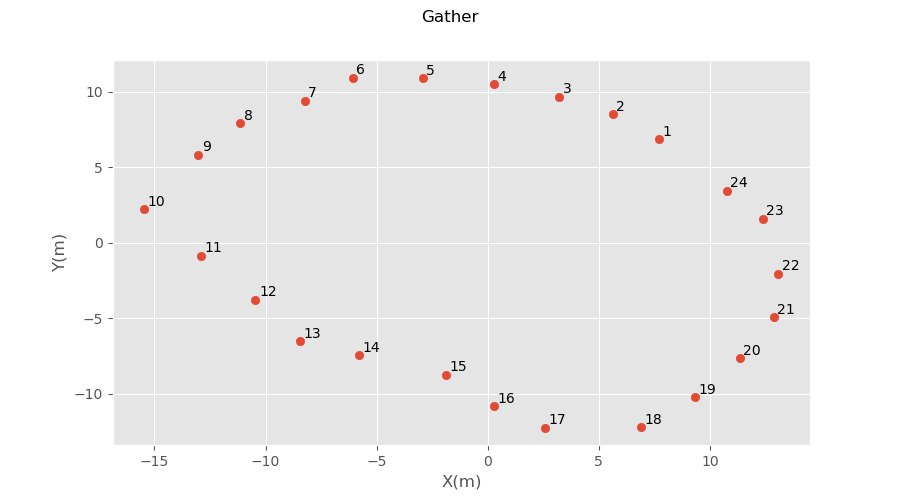

''

In [2]:
"""
====================== READ PHONES LOCATIONS ======================
"""
#------ Read the phones cartesian locations
#--- Reads the CSV file with (x, y)m locations
ttb_loc = u.RGloc('../Data/'+'ttb_loc.dat')
#------ Read the phones geographic locations
#--- Reads the CSV file with (lat,lon) in degress locations
ttb_gloc = u.RGloc('../Data/'+'ttb_gloc.dat')
#
#------ Plot gather in cartesian
p.pgather(ttb_loc[:,1], ttb_loc[:,2], ttb_loc[:,0], coord='cartesian')

### ---
### Read data files from TTB22

In [3]:
"""
====================== READ THE SEISMIC DATA LOCALLY ======================
File hints:
3710 and 3720 -> several events
3740 -> 2 events
3790 -> 1 event (6-9)s
"""
#------ Read the seismic data
ent = str(np.random.choice(np.arange(3700, 3811, 10)))
ent = input(f'   Enter a file number in [3695, 3810], rtn=random:\n') or ent
ent = ent.rstrip().split(' ')
print(f">> Read with data file {ent}")
ent = '../Data/ttb/'+ent[0]+'.dat'
#
#------- Read the data file as a SEG2 object.
st     = read(ent)
#
#------- Print stream information
dummy = float(st[-1].stats.seg2.RECEIVER_LOCATION)
print(f">> Gather acquired on {st[0].stats.starttime}, has {int(st[0].stats.npts)} data points.")

   Enter a file number in [3695, 3810], rtn=random:
 3790


>> Read with data file ['3790']
>> Gather acquired on 2022-04-02T13:41:44.000000Z, has 15000 data points.


---
### Create a new stream from the SEG2 stream

In [4]:
#
"""
================= Create a new stream from the SEG2 stream ======================
                         Retain a gather copy
"""
#------ Create a new stream from the SEG2 stream.
#       1) Adds coordinates to gather. Stores a copy in gather0
#       2) Gather baricenter = bcenter.
gather, bcenter = u.creastrm(st, ttb_gloc)
gather0 = gather.copy()
#
#--- Phone choice
phone = None

>> A new gather with baricenter bcenter is created at AttribDict({'latitude': -1.201924971512567, 'longitude': -48.506498036629125, 'elevation': 5.0})


---
### Filter and look at the frequency contents


 Enter filter min and max frequencies (dflt = 10.0, 40.0) 


>> The mean of 1st original trace is -13.542529197865724
>> Notched original trace from 59.2 to True
>> Useful range due to bandpass 10.0 40.0 filter: 10.0 to 40.0Hz.
 Random phone 14 


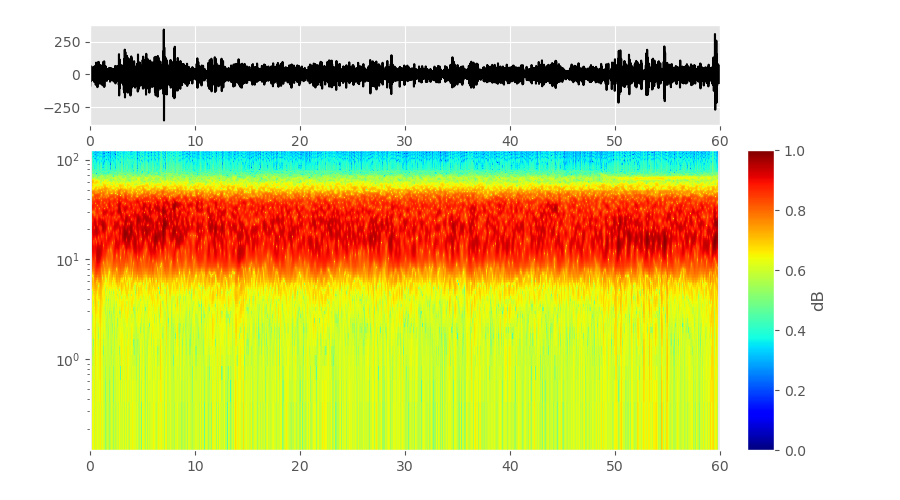

 Run this cell again (rtn= No, else plot Spectrogram)?:  


 A new stream backup was created.


In [5]:
#
"""
================= Filter data and look at the frequency contents ======================
                    Create a new stream from the SEG2 stream
"""
#
#------- Remove mean and trend + filter the stream
#--- Filter parameters: change them as you wish.
MTparam = [ 1,   1,    'bp',  10.,   40.,   0,    0]
# └─────> [dtr, line, ftype, Fmin, Fmax, taper, gain]
#                                          └─> data will be windowed at resample below
ent = str(MTparam[3]) + ' ' + str(MTparam[4])
ent = input(f'\n Enter filter min and max frequencies (dflt = {MTparam[3]}, {MTparam[4]})') or ent
ent = ent.rstrip().split(' ')
MTparam[3], MTparam[4] = [float(dummy) for dummy in ent]
#
gather = u.otrstr(gather, MTparam)
#
#------- Check frequency contents to accept preprocessing
#--- Pick up a random phone/trace
phone = phone if phone is not None else np.random.randint(1, len(gather)+1)
print(f' Random phone {phone} ')
#--- Go to trace instead of phone: trace = phone -1
phone = phone - 1
#--- Relative time: nummpy array
time = gather[phone].times(type="relative")
#--- Plot Trace+Spectrogram
p.Pspect(time, gather[phone])
#
#------- Once filtering is accepted create a new backup for gather
ent = input(f' Run this cell again (rtn= No, else plot Spectrogram)?: ') or False
if not ent:
    gather0 = gather.copy()
    print(f' A new stream backup was created.')
else:
    gather = gather0.copy()

---
## Display all the data as a seismogram
- A distance dependent plot shows the different move-out of seismic arrivals and gives an idea of the  backazimuth and slowness that could be expected.

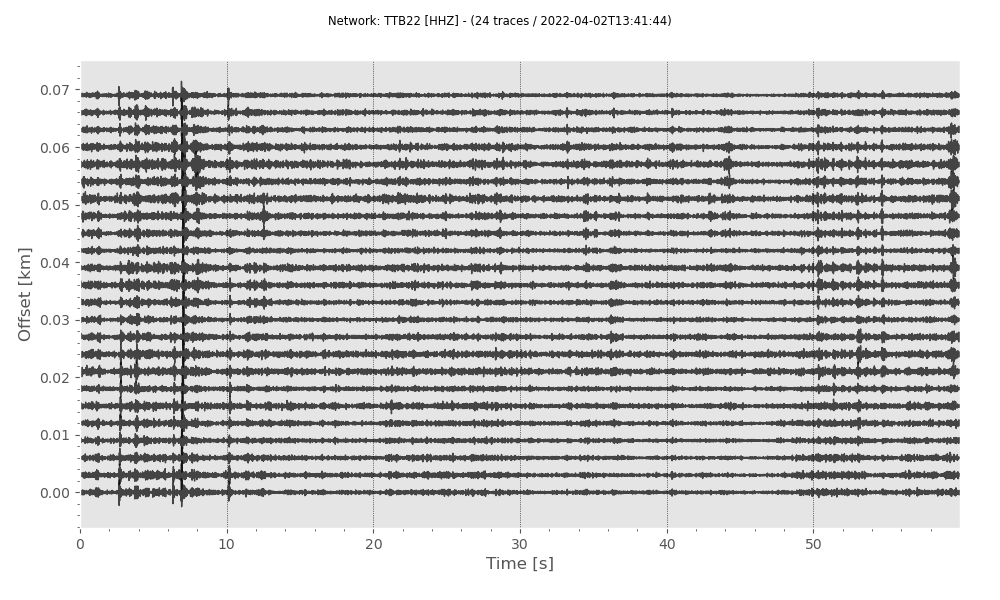

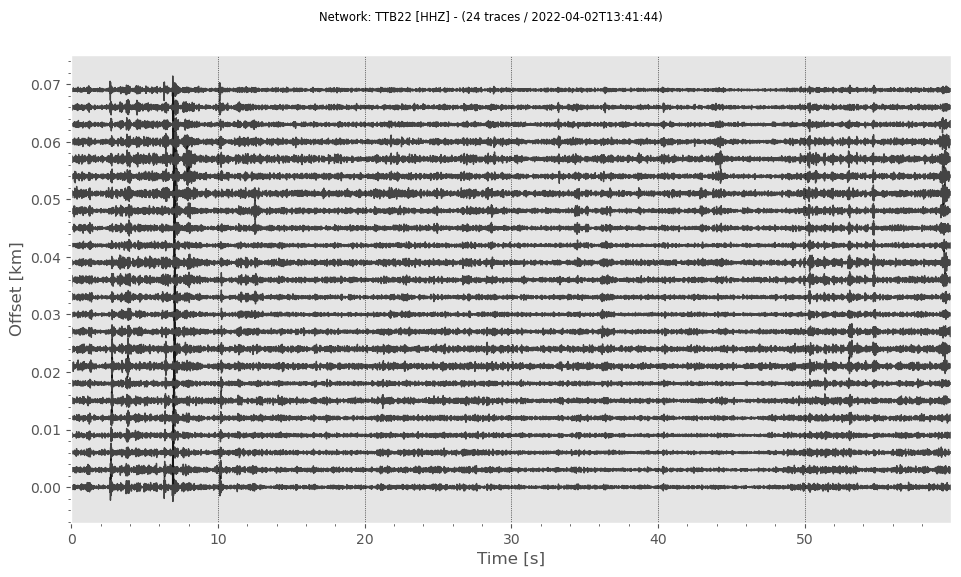

In [6]:
"""
====================== Plot Seismogram ======================
"""
gather.plot(type='section',
            scale=1.3, alpha=.7,
            orientation='horizontal')

In [ ]:
"""
====================== Zoom in to select [t0, t1]======================
"""
#------ Zoom in the seismogram
ent = input(f' Enter t0 and t1 to zoom: ')
ent = ent.rstrip().split(' ')
t0 = float(ent[0])
t1 = float(ent[1])
#
dt = gather[0].stats.starttime
gather.plot(type='section',
            scale=1.3, alpha=.7,
            starttime=dt+t0, endtime=dt+t1,
            orientation='horizontal')

In [7]:
"""
====================== Local Functions ======================
"""

#
# ---------- Spectral whitening ----------
"""
  Finds all divisors of a given number with zero reminder
  <Args>
    tr: A trace.
    freqmin
    freqmax
  <Returns>
    tr: whitened trace
"""
def whiten(tr, freqmin, freqmax):
#
    nsamp = tr.stats.sampling_rate
    
    n = len(tr.data)
    if n == 1:
        return tr
    else: 
        frange = float(freqmax) - float(freqmin)
        nsmo = int(np.fix(min(0.01, 0.5 * (frange)) * float(n) / nsamp))
        f = np.arange(n) * nsamp / (n - 1.)
        JJ = ((f > float(freqmin)) & (f<float(freqmax))).nonzero()[0]
            
        # signal FFT
        FFTs = np.fft.fft(tr.data)
        FFTsW = np.zeros(n) + 1j * np.zeros(n)

        # Apodization to the left with cos^2 (to smooth the discontinuities)
        smo1 = (np.cos(np.linspace(np.pi / 2, np.pi, nsmo+1))**2)
        FFTsW[JJ[0]:JJ[0]+nsmo+1] = smo1 * np.exp(1j * np.angle(FFTs[JJ[0]:JJ[0]+nsmo+1]))

        # boxcar
        FFTsW[JJ[0]+nsmo+1:JJ[-1]-nsmo] = np.ones(len(JJ) - 2 * (nsmo+1))\
        * np.exp(1j * np.angle(FFTs[JJ[0]+nsmo+1:JJ[-1]-nsmo]))

        # Apodization to the right with cos^2 (to smooth the discontinuities)
        smo2 = (np.cos(np.linspace(0., np.pi/2., nsmo+1.))**2.)
        espo = np.exp(1j * np.angle(FFTs[JJ[-1]-nsmo:JJ[-1]+1]))
        FFTsW[JJ[-1]-nsmo:JJ[-1]+1] = smo2 * espo

        whitedata = 2. * np.fft.ifft(FFTsW).real
        
        tr.data = np.require(whitedata, dtype="float32")

        return tr
#
# -------------- End of function   ---------------------
"""
  Retrieves the coordinates (X, Y) of a point with a given index from a 3-column matrix.
  <Args>
    matrix: A NumPy array representing the 3-column matrix (index, X, Y).
    index: The integer index of the point to find.
  <Returns>
    A tuple (X, Y) representing the coordinates of the point.
  <Raises>
    ValueError: If the index is not found in the matrix.
"""
#
def get_coords(matrix, index):
#
  # Find the row corresponding to the given index
  row_index = np.where(matrix[:, 0] == index)

  if row_index[0].size == 0 :
    raise ValueError(f"Index {index} not found in the matrix.")
  
  #--- Extract X and Y coordinates
  x = matrix[row_index[0][0], 1]
  y = matrix[row_index[0][0], 2]

  return (x, y)
#
# -------------- End of function   ---------------------
#
# ---------- divisors ----------
"""
  Finds all divisors of a given number with zero reminder
  <Args>
    num: The number for which to find divisors.
  <Returns>
    A list of integers
"""
#
def divisors(num, thres):
  div = []
  for i in range(1, num + 1):
    if num % i == 0:
      div.append(i)
  div =  div[1:-2] if len(div) >= 3 else None
#--- Limits list values
  if div is not None:
      div =  [div for div in div if div >= thres]
  return div
#
# -------------- End of function   ---------------------

### Down-sampling Data
Ambient noise generally conducted in low frequency range, it will reduce computation cost if data is down-sampled.


>> Phone 14 has 15000 data points with a sampling rate of 250.0Hz,
    this sampling rate can be lowered to the following integer values [50]Hz



<< Enter a new sampling rate from the above list: 50



>> Phone 14 has now 3000 data points with a new sampling rate of 50.0Hz,


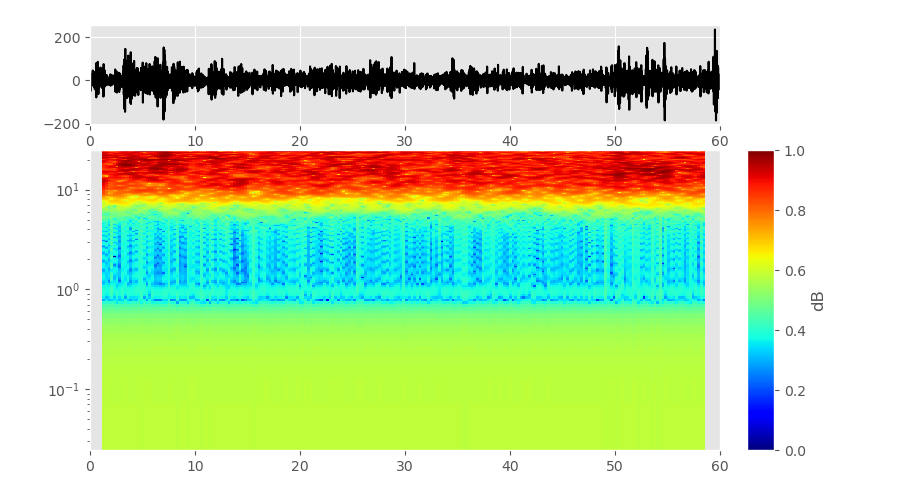

 Run this cell again (rtn= No)?:  


 A new stream backup was created.


In [8]:
#
gather = gather0.copy()
"""
================= Downsample stream by an integer factor ======================
"""
print(f'\n>> Phone {phone+1} has {gather[phone].stats.npts} data points with a sampling rate of {gather[phone].stats.sampling_rate}Hz,')
dummy =  divisors(int(gather[phone].stats.sampling_rate), MTparam[4])
print(f'    this sampling rate can be lowered to the following integer values {dummy}Hz')
ent = input(f'\n<< Enter a new sampling rate from the above list:')
ent = float( ent.rstrip().split(' ')[0] )
#--- Resample with the defaults: window='hann', no_filter=True (as data is already filtered!)
gather.resample(ent)  
print(f'\n>> Phone {phone+1} has now {gather[phone].stats.npts} data points with a new sampling rate of {gather[phone].stats.sampling_rate}Hz,')
#------- Check frequency contents of a trace to accept downsampling
#--- Relative time: nummpy array
time = gather[phone].times(type="relative")
#--- Plot Trace+Spectrogram
p.Pspect(time, gather[phone])
#
#------- Once filtering is accepted create a new backup for gather
ent = input(f' Run this cell again (rtn= No)?: ') or False
if not ent:
    gather0 = gather.copy()
    print(f' A new stream backup was created.')
else:
    gather = gather0.copy()

---
### Spectral whitening
Spectral whitening of trace `tr` using a cosine tapered boxcar between `freqmin` and `freqmax`.
- Work with two traces from now on.


<< Enter two phones: 2 24


2 Trace(s) in Stream:
TTB22.2.0.HHZ  | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.980000Z | 50.0 Hz, 3000 samples
TTB22.24.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.980000Z | 50.0 Hz, 3000 samples

>> The distance btw phones 1 and 23 is 7.06m


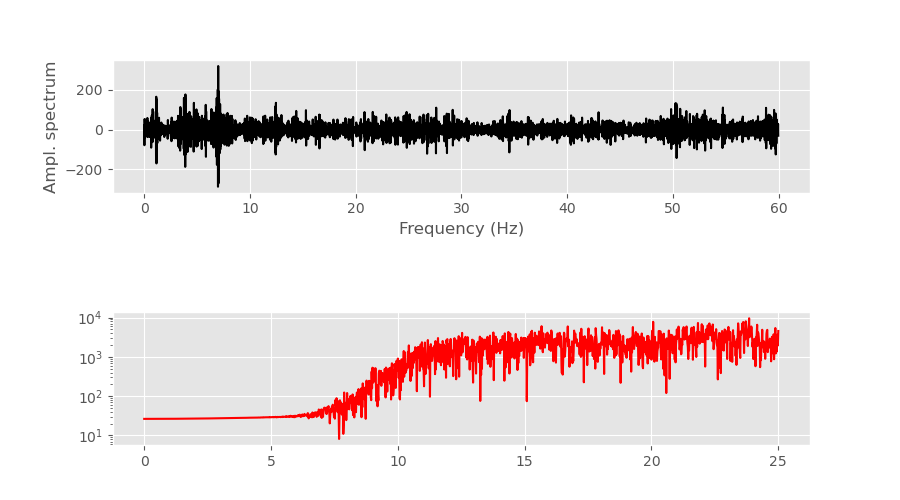

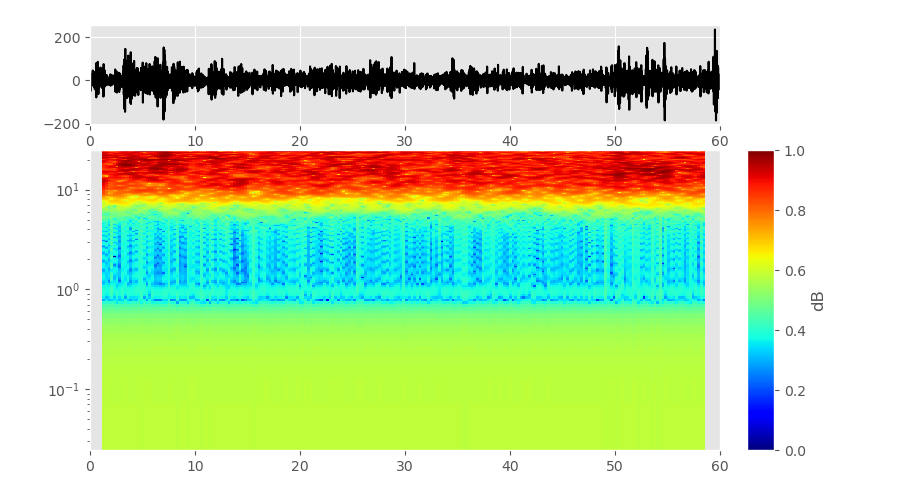

In [9]:
"""
====================== Choose two traces ======================
"""
#------ Get two traces
ent = input(f'\n<< Enter two phones:')
if not ent: raise ValueError("phone1 and phone2 mandatory.")
ntr1, ntr2 = np.array(ent.rstrip().split(' '), dtype=int) - 1
#
#------ Create an empty stream add the two traces
estrm = Stream()
estrm += gather[ntr1].copy()
estrm += gather[ntr2].copy()
print(estrm)
#estrm.plot(color='blue', type='relative', equal_scale=False, automerge=False)  #handle=True, 
#
#------ Distance between the two phones
point1 = get_coords(ttb_loc, ntr1)
point2 = get_coords(ttb_loc, ntr2)
dist = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
#
print(f'\n>> The distance btw phones {ntr1} and {ntr2} is {np.round(dist, 2)}m')

#
# Frequency domain +───────+─> trace data as a nummpy array

dt   = gather[ntr1-1].stats.delta               # sampling interval
fNy  = 1. / (2.0 * dt)                          # Nyquist frequency

FtrZ = np.fft.rfft(gather[ntr1-1].data)

#--------  frequency values+───────+─> length of FT of the signal
freq = np.linspace(0, fNy, len(FtrZ))
p.pltTrSp(time, gather[ntr1-1], freq, abs(FtrZ),
        x1label='Time (s)', y1label='Amplitude',
        x2label='Frequency (Hz)', y2label='Ampl. spectrum', y2log=True
        )
#------- Check frequency contents of a trace to accept downsampling
#--- Relative time: nummpy array
time = gather[phone].times(type="relative")
#--- Plot Trace+Spectrogram
p.Pspect(time, gather[phone])

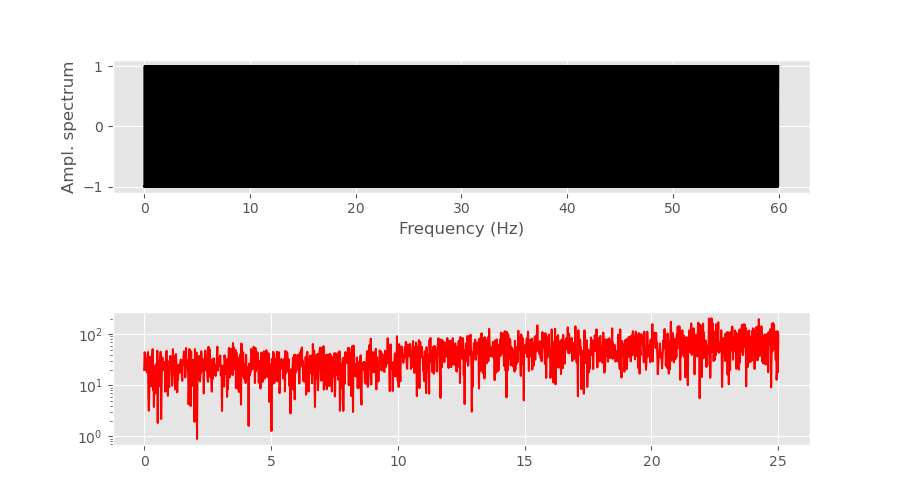

In [10]:
"""
====================== Spectral whitening of two traces ======================
"""
dummy = UTCDateTime(estrm[0].stats.starttime)
estrm[0].data = np.sign(estrm[0].data)
estrm[1].data = np.sign(estrm[1].data)

FtrZ = np.fft.rfft(estrm[ntr1-1].data)

p.pltTrSp(time, estrm[ntr1-1], freq, abs(FtrZ),
        x1label='Time (s)', y1label='Amplitude',
        x2label='Frequency (Hz)', y2label='Ampl. spectrum', y2log=True
        )

#estrm.plot(starttime=dummy, endtime=dummy+5, color='blue', type='relative', equal_scale=False, automerge=False)




---
### One-bit Normalization
Remove the non-stationary events that inevitably lie in seismic records by one-bit normalization. This consists of replacing each sample of a record by its sign. In this way each data point is replaced with either a 1 or -1, depending on its sign, which remove the amplitude information from the data.

2 Trace(s) in Stream:
TTB22.2.0.HHZ  | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.980000Z | 50.0 Hz, 3000 samples
TTB22.24.0.HHZ | 2022-04-02T13:41:44.000000Z - 2022-04-02T13:42:43.980000Z | 50.0 Hz, 3000 samples


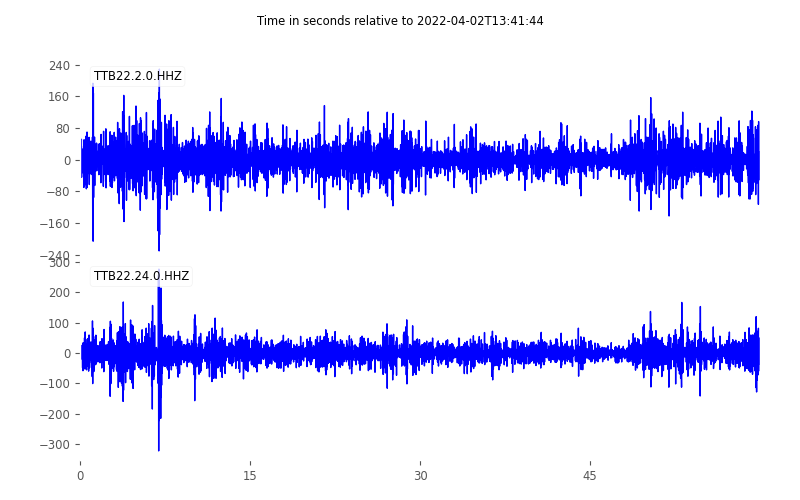

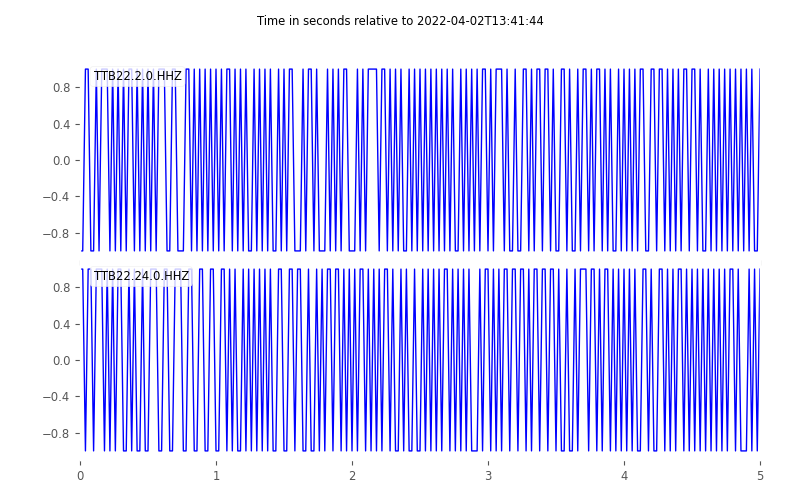

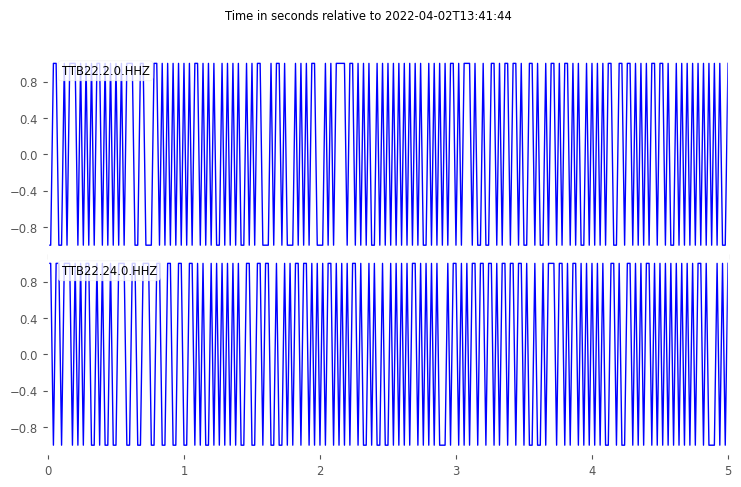

In [11]:
"""
====================== Create a new gather with all traces normalized ======================
"""
#------ Create an empty stream
estrm = Stream()
estrm += gather[ntr1].copy()
estrm += gather[ntr2].copy()
print(estrm)
estrm.plot(color='blue', type='relative', equal_scale=False, automerge=False)  #handle=True, 
#
dummy = UTCDateTime(estrm[0].stats.starttime)
estrm[0].data = np.sign(estrm[0].data)
estrm[1].data = np.sign(estrm[1].data)

estrm.plot(starttime=dummy, endtime=dummy+5, color='blue', type='relative', equal_scale=False, automerge=False)

## Ambient Noise Cross-correlation
- Given two seismometers, $u_1$ and $u_2$, on the surface, will record ground motion as a function of time. Over long periods of time, the cross-correlation of ground motions is
$$C_{1,2}\left(\tau\right)=\int u_{1}\left(t\right)\,u_{2}\left(t+\tau\right)dt$$

- Data Preparation and inital processing
Prepare waveform data from each station separately to accentuate broad-band ambient noise.


>> Correlate trace 1 with 3000 with trace 23 with 3000 points

>> Masimum lag = -0.040000000000000036s, corresponding to a velocity -176.39m/s


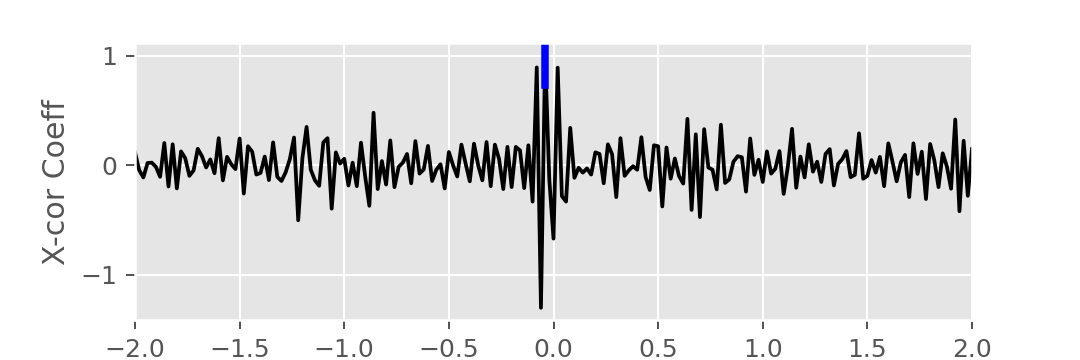

In [17]:
print(f'\n>> Correlate trace {ntr1} with {estrm[0].stats.npts} with trace {ntr2} with {estrm[1].stats.npts} points')
max_lagtime = 2
0
max_shift_num = int(np.round(max_lagtime*estrm[0].stats.sampling_rate))
data1 = estrm[0].data
data2 = estrm[1].data
len1 = len(data1)
len2 = len(data2)
min_len = min(len1,len2)
cross_list = []
for shift_num in np.arange(-max_shift_num,max_shift_num+1,1):
    if shift_num<0:
        correlate_value = np.correlate(data1[:min_len+shift_num],data2[-shift_num:min_len])
        cross_list.append(correlate_value.ravel())
    else:
        correlate_value = np.correlate(data2[:min_len-shift_num],data1[shift_num:min_len])
        cross_list.append(correlate_value.ravel())
cross_list = np.array(cross_list)
cross_list = cross_list/np.max(cross_list)
#
fs_new = estrm[0].stats.sampling_rate
time = np.linspace(-max_lagtime,max_lagtime,int(2*max_lagtime*fs_new+1))
#-------- 
indexmax = np.argmax(cross_list)
travtime = time[indexmax]
print(f'\n>> Masimum lag = {travtime}s, corresponding to a velocity {np.round(dist/travtime, 2)}m/s')
#
plt.figure(figsize=(6, 2), dpi=180)
plt.plot(time,cross_list, 'k-')
#plt.plot(time, envelope, 'r-')
plt.axvline(travtime, 0.85, 1, color='b', lw=3)
plt.xlabel("Time (s)")
plt.ylabel("X-cor Coeff")
plt.xlim(-max_lagtime,max_lagtime)
plt.show();

- Is this velocities expected to be real?

<img src="./rockVel.png" width="500">